# DATA 1 Practical 5
                                                                                                    Simos Gerasimou


## A Data Journey In Probability Distributions and Inferential Statistics

**Pandas API Reference**: https://pandas.pydata.org/pandas-docs/stable/reference/index.html

**Matplotlib API Reference**: https://matplotlib.org/3.1.1/api/index.html

**Seaborn API Reference**: https://seaborn.pydata.org/api.html

***

## Part A'

### Understanding the Cental Limit Theorem

The **central limit theorem** states that, given a sufficiently large sample size, the sampling distribution of the mean for a random variable will approximate a normal distribution regardless of the variable's distribution in the population.

---

Nisa store at the University of York has recently installed self-checkout machines and the Nisa store manager wants to investigate the time spent by students waiting to be serviced. The manager expects that most students should be able to check out immediately and exponentially fewer students to wait for a successive time. 

He consults a statistician, whose advice was to model the waiting time at the store using an **exponential distribution** which enables to model the amount of waiting time until the next event with its formula given by $f(x;\lambda) = \lambda e ^{-\lambda x}$, if $x \geq 0$, where $\lambda$ is the average rate of occurence per interval. For instance, if $\beta$ customers are serviced per hour the rate $\lambda = 1/\beta$.

Based on some preliminary analysis of the log of the self-checkout machines, the manager has found that the on average each machine services **15 customers per hour, i.e., $\lambda=1/15$**.

---

**TA1)  Generate 10000 samples following the exponential distribution with $\beta=15$ ($\lambda=1/15$). Store this data in a list.**

* Hint: Look at random.exponential() function of numpy [(reference)](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.exponential.html)


In [1]:
#Write your answer here
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_exponential = np.random.exponential(scale=15, size=10000)
data_exponential

array([ 3.51172413, 14.42279961,  5.66370058, ...,  4.73023313,
       12.61272445, 20.93013537])

**TA2)  Print the mean of the generated data that is saved on the list.**


In [3]:
#Write your answer here
data_exponential.mean()
#print(np.mean(data_exponential))

15.311642255000939

**TA3)  Plot the histogram of the generated data and the density plot. What is the shape of the distribution? Can you understand what it represents?**

* Hint: You may use matplotlib or (better) seaborn (https://seaborn.pydata.org/generated/seaborn.distplot.html)
* Do not just ignore the question about trying to understand the distribution!


c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 175.0)

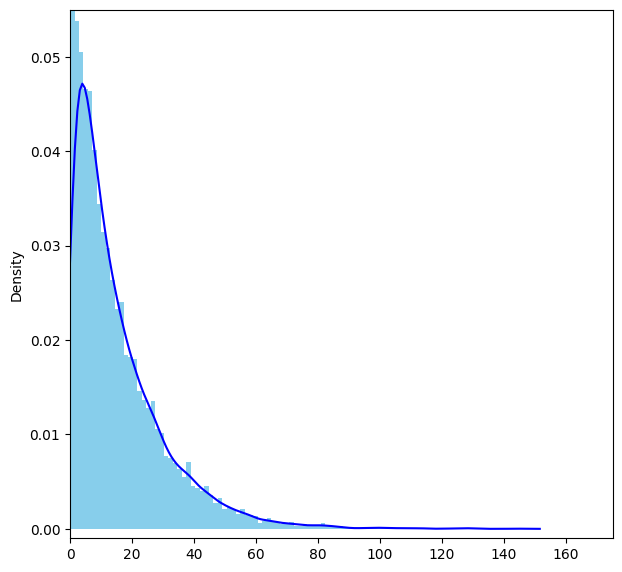

In [4]:
#Write your answer here
plt.subplots(figsize=(7, 7), dpi=100)
ax = sns.distplot(data_exponential, kde=True, bins=100, kde_kws={"shade": False, "color": "b"}, color="skyblue", hist=True, hist_kws={"linewidth": 15, "alpha": 1})

ax.set_ylim(-0.001, 0.055)
ax.set_xlim(-0, 175)

**TA4) Plot again the density curve from the previous task. On the sample plot try to plot the curve as given by the definition of the exponential distribution. What do you expect the relationship between these two plot to be?**

* Hint: Check the definition of the exponential distribution. What do you need to plot it?
* Hint: Check the range of the values on the X axis

c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(0.0, 175.0)

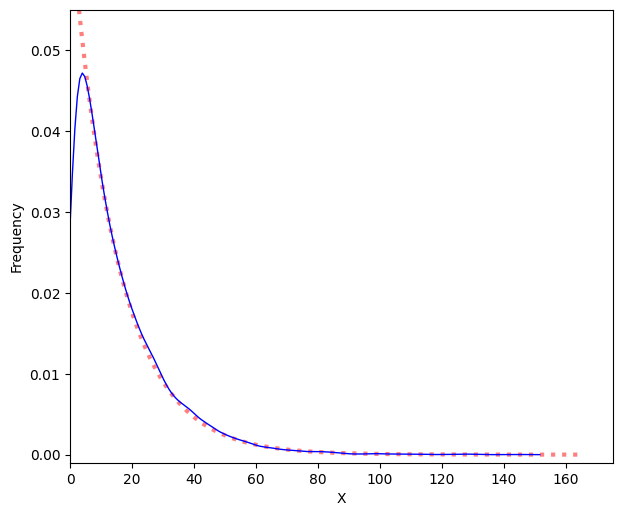

In [5]:
#Write your answer here
plt.subplots(figsize=(7, 6), dpi=100)
lambd=1/15
xx = np.arange(0, 165, 0.01)  # range 0 to 165, with step 0.01
yy = lambd*np.exp(-lambd*xx)
ax = plt.plot(xx, yy, color="red", lw=3, ls=":", alpha=0.5, label="cdf")  # lw is line width (lol if 100), ls is line style (noice if ':' - dotted is best, dashed ls '-' is default, '-.' dash dot makes my head hurt)
# alpha parameter regulates the transparancy of graph plot
ax = sns.distplot(data_exponential, kde=True, bins=100, kde_kws={"shade": False, "lw": True}, color="blue", hist=False,
               hist_kws={"linewidth":15, "alpha":1})  
# kde enables Kernel Density Plot along with the distplot
ax.set(xlabel="X", ylabel="Frequency")
ax.set_ylim(-0.001, 0.055)
ax.set_xlim(-0, 175)

# relationship is same for when x is in certain range

**TA5) Using the data generated in TA1, (i) generate and (ii) plot the distribution of sample means over $k=20$ sampling times with $n=5$ (the sampling size).**

* Hint:  The "Distribution of Sample Means" is the collection of sample means over repeated sampling of a particular size (n) from a population
* Hint: You might want to check how to select randomly using Numpy

c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


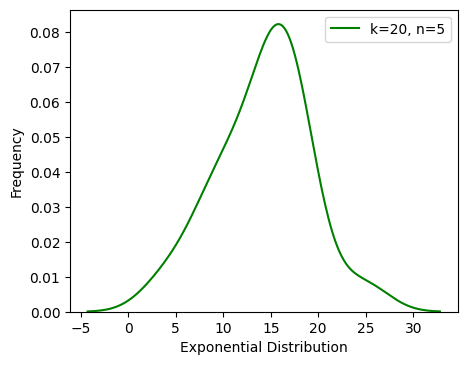

In [6]:
#Write your answer here
n = 5
k = 20
avg = []
for i in range(1, k):
    values = np.random.choice(data_exponential, n)  # generates random sample of size n from data_exponential
    avg.append(np.average(values))
avg

color = ["r", "g", "b", "y"]

plt.subplots(figsize=(5, 4), dpi=100)
ax = sns.distplot(avg, kde=True, kde_kws={"shade": False}, bins=100, hist=False, color="g", hist_kws={"linewidth": 15, "alpha": 0.5},\
                  label="k={:.0f}, n={:.0f}".format(k, n))

ax.set(xlabel="Exponential Distribution", ylabel="Frequency")
ax.legend()

# each iteration varies, but with a global maximum at 12~ish Exponential Distribution wise XOS


**TA6) Repeat TA5 with $n \in \{5, 20, 40\}$. What do you observe as $n$ increases?**

c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

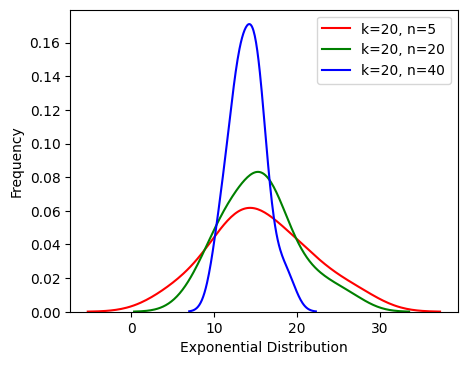

In [7]:
#Write your answer here
N = [5, 20, 40]
k = 20
avgN = []
for n in N:  # loopings
    avg = []
    for i in range(1, k):
        values = np.random.choice(data_exponential, n)
        avg.append(np.average(values))
    avgN.append(avg)

color = ["r", "g", "b", "y"]

plt.subplots(figsize=(5, 4), dpi=100)

for i in range(0, len(N)):
    ax = sns.distplot(avgN[i], kde=True, kde_kws={"shade": False}, bins=100, hist=False, color=color[i], hist_kws={"linewidth": 15, "alpha": 0.5},\
                      label="k={:.0f}, n={:.0f}".format(k, N[i]))

ax.set(xlabel="Exponential Distribution", ylabel="Frequency")
ax.legend()

# more convergence towards true mean (mew ig)/more frequency towards true mean, as sample size increases

**TA7) Repeat TA5 with  $n=50$ and $k \in \{5, 20,50\}$. What do you observe as $k$ increases?**

c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

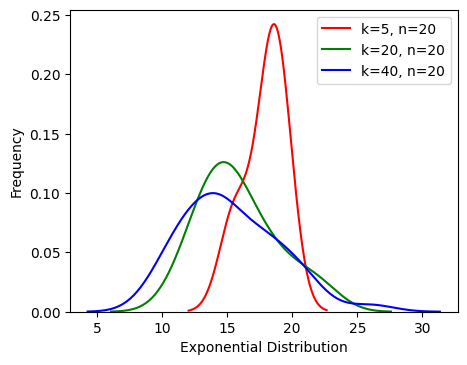

In [8]:
#Write your answer here
K = [5, 20, 40]
n = 20
avgK = []
for k in K:  # loopings
    avg = []
    for i in range(1, k):
        values = np.random.choice(data_exponential, n)
        avg.append(np.average(values))
    avgK.append(avg)

color = ["r", "g", "b", "y"]

plt.subplots(figsize=(5, 4), dpi=100)

for i in range(0, len(K)):
    ax = sns.distplot(avgK[i], kde=True, kde_kws={"shade": False}, bins=100, hist=False, color=color[i], hist_kws={"linewidth": 15, "alpha": 0.5},\
                      label="k={:.0f}, n={:.0f}".format(K[i], n))

ax.set(xlabel="Exponential Distribution", ylabel="Frequency")
ax.legend()

# means seem to increase as k increases


## Part B'

### The Normal Distribution


**TB1) Suppose $X\sim N(5, 6^2)$. Find the z scores for x=17 and x=1 and explain their meaning.**


In [9]:
#Write your answer here
# where mew is the actual μ (mu - lowercase), and σ (sigma - lowercase) is the actual standard deviation
# z_value = (x_value - μ) / σ  # for distribution where X ~ N(μ, σ^2)
def finding_x_value_from_z_value(x):
    return((x - mew) / sigma)
mew = 5
sigma = 6
x1 = 17
print("when x = " + str(x1) + ", z =", finding_x_value_from_z_value(x1))
# z1 is 2.0 standard deviations above the mean
x2 = 1
print("when x = " + str(x2) + ", z =", finding_x_value_from_z_value(x2))
# z2 is -0.66 standard deviations above the mean i.e 0.66 standard deviations below the mean

when x = 17, z = 2.0
when x = 1, z = -0.6666666666666666


**TB2) The final exam scores in the Machine Learning 101 module were normally distributed with a mean of 63 and a standard deviation of five.**

**(i)  What is the probability that a randomly selected student scored more than 65 on the exam? You must show your calculations and you may use the Z table at** http://www.z-table.com

**(ii) What is the probability of randomly selecting a student with score less than 85?**

* Hint: You may want to use scipy.stats.norm to answer the following questions (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [10]:
#Write your answer here
# note: visualisation of the bell curve would be helpful for this
# S ~ N(63, 5^2)
# assuming exam is out of 100 marks
from scipy.stats import norm
print("probability that randomly selected student, S, scored more than 65 on the exam:")
# print(100 - norm.ppf(q=0.65, loc=63, scale=5))  # cuz norm.ppf(q=0.65, loc=63, scale=5) gives probability that randomly selected student scored less than 65 on the exam
# don't get what use this line of code is XOS
# ppf is percentage point function for percentiles and cdf is cumulative distribution function
# .ppf() function calculates the probability for a given normal distribution value,
# while .cdf() function calculates the normal distribution value for which a given
# probability is the required value ~ cdf and ppf are inverses of each other in this particular sense
# e.g.
# print(norm.ppf(0.95))  # gives z value output, from area under the bell curve to the left of z input: 1.6448536269514722 
# print(norm.cdf(1.6448536269514722))  # gives area under the bell curve to the left of z, from z value: 0.95
# as they are inverses of each other on the normal distribution

# alternatively, could calculate P(S>65) through standardised normal distribution N(0, 1^2)
# z = (x - μ) / σ = (65 - 63) / 5 = 2 / 5 = 0.4
print(1 - norm.cdf(x=0.4, loc=0, scale=1))  # or looking at the z table 0.4 down, 0,0 across can get 0.6554, which is minused by 1 to get the greater than area of the bell curve to give 0.3446



probability that randomly selected student, S, scored more than 65 on the exam:
0.3445782583896758


In [11]:
#Write your answer here
print("probability that randomly selected student, S, scored less than 85 on the exam:")
z = (85-63)/5
print(norm.cdf(x=z, loc=0, scale=1))  # huh seems that it is virtually impossible to score more than 85 marks
# print(norm.ppf(q=0.99, loc=63, scale=5))  # just to check - this means 99% of the scores are 74.6 marks or less

# "A score of 85 is 4.4 standard deviations from the mean of 63 which is much beyond the range
# of the standard normal table. Therefore, the probability that one student scores less than 85
# is approximately one (or 100%)."

probability that randomly selected student, S, scored less than 85 on the exam:
0.9999945874560923


**TB3) The average number of hours a household personal computer is used for entertainment is two hours per day. Assume the times for entertainment are normally distributed and the standard deviation for the times is half an hour.**

**(i) Find the probability that a household personal computer is used for entertainment between 1.8 and 2.75 hours per day.**

In [12]:
#Write your answer here
# E ~ N(2, 0.5^2)
# Z ~ N(0, 1^2)
z1 = (2.75-2)/0.5  # = 1.5
z2 = (1.8-2)/0.5  # = -0.4
# P(2.75 > E > 1.8) = P(E < 2.75) - P(E < 1.8) = P(Z < 1.5) - P(Z < -0.4)
print("P(2.75 > E > 1.8) =", norm.cdf(z1, 0, 1) - norm.cdf(z2, 0, 1))
# yaaaas got it by doing it by myself alhamdulillah =)

P(2.75 > E > 1.8) = 0.588614540341466


**(ii) Find the maximum number of hours per day that the bottom quartile of households uses a personal computer for entertainment.**

In [13]:
#Write your answer here
# bottom quartile => 0.25
# P(E = 0.25) ~ kinda, even tho continuous distribution  # wai scrap this wrong way round
# redo:
# P(E < ?) = 0.25  # to find ? ~ maximum number of hours per day the bottom quartile of households use PCs for entertainment purposes
print(norm.ppf(0.25, 2, 0.5))

# or alternatively using the formula:
z = norm.ppf(0.25, 0, 1)
# z = (x - μ) / σ
# z = (x - 2) / 0.5
x = (z * 0.5) + 2
print(x)

1.6627551249019592
1.6627551249019592


**TB4) A citrus farmer who grows mandarin oranges finds that the diameters of mandarin oranges harvested on his farm follow a normal distribution with a mean diameter of 5.85 cm and a standard deviation of 0.24 cm.**

**(i) Find the probability that a randomly selected mandarin orange from this farm has a diameter larger than 6.0 cm. Also, plot the density curve with the area covered by the probability shaded.**

* Hint: You might want to check how to draw random samples using numpy https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
* Hint: The following code snippet might be useful

```python
ax = sns.kdeplot(dist, shade=True)
line = ax.get_lines()[-1]
x, y = line.get_data()
mask = x > 0
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor='red')
```


0.2659855290487
0.2659855290487


c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


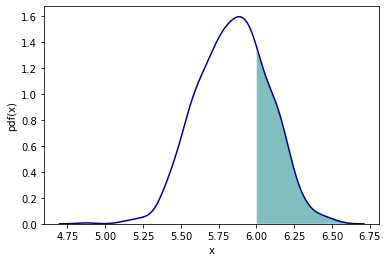

In [14]:
#Write your answer here
# D ~ N(5.85, 0.24^2)
# P(D > 6.0)
z = (6-5.85)/0.24
print(1 - norm.cdf(z, 0, 1))
# is the same as
print(1 - norm.cdf(6.0, 5.85, 0.24))

# visualisings
plt.subplots()
data_normal = np.random.normal(5.85, 0.24, 1000)
# data_normal = norm.rvs(size=10000, loc=0, scale=1)
ax = sns.distplot(data_normal, kde=True, color="navy", hist=False, kde_kws={"shade": False}, hist_kws={"linewidth": 15, "alpha": 1})
# howww does this look like THE Normal tho, looool T.T X'D
ax.set_xlabel("x")
ax.set_ylabel("pdf(x)")
ax.grid(False)
line = ax.get_lines()[-1]
x, y = line.get_data()
mask = (x > 6)
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor="teal")


**(ii) Calculate the middle 20% of mandarin oranges from the farm. Also, plot the density curve with the area covered by the probability shaded.**

In [15]:
# 10% below the mean and 10% above the mean, where the mean is at 50%, so
# P(0.4 < D < 0.6) = P(D < 0.6) - P(D < 0.4) #WRONG they be areas/probabilities not diameters! (also annoyingly badly worded unspecific question XS)
# we want the diametre range of the middle 20% (between 0.4 and 0.6)
z1 = norm.ppf(0.6, 0, 1)
z2 = norm.ppf(0.4, 0, 1)
x1 = 0.24*z1 + 5.85
x2 = 0.24*z2 + 5.85
print("the middle 20% of mandarin oranges have diameters in range", x1, "and", x2)

the middle 20% of mandarin oranges have diameters in range 5.910803304752592 and 5.789196695247408


c:\projects\scaleystuffs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


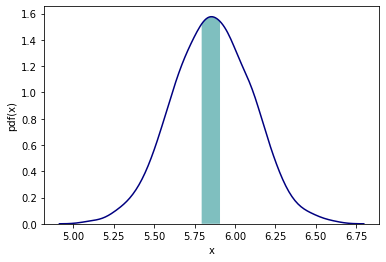

In [16]:
#Write your answer here
# visualisings
plt.subplots()
data_normal = np.random.normal(5.85, 0.24, 1000)
# data_normal = norm.rvs(size=10000, loc=0, scale=1)
ax = sns.distplot(data_normal, kde=True, color="navy", hist=False, kde_kws={"shade": False}, hist_kws={"linewidth": 15, "alpha": 1})
# howww does this look like THE Normal tho, looool T.T X'D
ax.set_xlabel("x")
ax.set_ylabel("pdf(x)")
ax.grid(False)
line = ax.get_lines()[-1]
x, y = line.get_data()
# mask = (x > 0.2) or (x < 0.2)  # wrrrong evalution at that as well t.t
mask = (x >= x2) & (x <= x1)
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor="teal")

# yum

--- 



## Part C'

### Inferential Statistics

**TC1) A manufacturer claims that the thickness of the spearmint gum it produces is 7.5 one-hundredths of an inch. A quality control specialist regularly checks this claim. On one production run, he took a random sample of $n = 10$ pieces of gum and measured their thickness. He obtained the following readings [7.65, 7.60, 7.65, 7.70, 7.55, 7.55, 7.40, 7.40, 7.50, 7.50] and would like to assess the validity of the claim made by the manufacturer having suspicions that the thickness might be not within the acceptable limits.**

**(i) State the Null and Alternative hypotheses**


In [17]:
#Write your answer here
# H0: μ = 7.5
# H1: μ != 7.5

**(ii) Calculate the degrees of freedom**

In [18]:
#Write your answer here
# 0.01  # wrong, not significance level
# df = n - 1  # where df is degrees of freedom and n is sample size
# df = 9

**(iii) Perform the appropriate t test to evaluate the hypotheses for significance level $\alpha = 0.05$. You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

https://docs.scipy.org/doc/scipy/reference/stats.html

In [19]:
#Write your answer here
gum_factory_samples_thickness = [7.65, 7.60, 7.65, 7.70, 7.55, 7.55, 7.40, 7.40, 7.50, 7.50]
# determining if sample is significantly differernt from the population via t test:
# ~ via formula
# t = (x̄ – μ) / (s / √n), where x̄ is observed sample mean, μ is theoretical population mean, s is sample's standard deviation, and n is sample size
t_calculation_analytically = (np.mean(gum_factory_samples_thickness) - 7.5) / (np.std(gum_factory_samples_thickness, ddof=1) / np.sqrt(len(gum_factory_samples_thickness)))

# ddof is delta degrees of freedom, defaulted to 0
# ~ via library
from scipy import stats
t_calculation_programmatically = stats.ttest_1samp(gum_factory_samples_thickness, 7.5)  # one sample

print(t_calculation_analytically, "\t", t_calculation_programmatically)

1.5389675281277262 	 Ttest_1sampResult(statistic=1.5389675281277262, pvalue=0.15819542053877977)


**TC2) A personal trainer measured the maximum heart rate of 29 of their trainees. The resulting data is: 
[170, 167, 174, 179, 179, 187, 179, 183, 179, 156, 163, 156, 187, 156, 167, 156, 174, 170, 183, 179, 174, 179, 170, 159, 187]. The personal trainer believes that their mean heart rate is greater than 170 and he is interested in testing this hypothesis.**

**(i) State the Null and Alternative hypotheses**

In [20]:
#Write your answer here
#Write your answer here
# H0: μ = 170
# Ha: μ > 170  # one tailed

**(ii) Calculate the degrees of freedom**

In [21]:
#Write your answer here

heart_rate_data = [170, 167, 174, 179, 179, 187, 179, 183, 179, 156, 163, 156, 187, 156, 167, 156, 174, 170, 183, 179, 174, 179, 170, 159, 187]
d_of_f = len(heart_rate_data) - 1
d_of_f

24

**(iii) Perform the appropriate t test to evaluate the hypotheses for significance level $\alpha = 0.05$. You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [22]:
#Write your answer here
# t = (x̄ – μ) / (s / √n)
print("Ho: μ = 170\nHa: μ > 170")
mew = 170
significance_level_cutoff = 1.711  # retrieved from t distribution table, when 𝛼 = 0.05 abd df = 24
t_via_formula = (np.mean(heart_rate_data) - mew) / (np.std(heart_rate_data, ddof=1)/np.sqrt(len(heart_rate_data)))
t_via_formula
t_via_library = stats.ttest_1samp(heart_rate_data, mew)[0]
t_via_library
t_value = (t_via_formula + t_via_library) / 2  # why not do it tookily longwindedly XP as is so very me XD
if t_value >= significance_level_cutoff:
    print("as the t value calulated of {} in this one tailed test is greater than the significance level cutoff of {} (at the significance level of 0.05), the null hypothesis Ho is rejected, and the alternative hypothesis Ha is accepted, so, from the sample data, it can be concluded that the true population mean is greater than 170.".format(t_value, significance_level_cutoff))
else:  # i.e if t_value < significance_level_cutoff:
    print("as the t value calulated of {} is less than the significance level cutoff of {} (at the significance level of 0.05), the null hypothesis Ho is not rejected, and the alternative hypothesis Ha is not accepted, so, from the sample data, it can be concluded that the true population mean is equal to 170, in this one tailed test.".format(t_value, significance_level_cutoff))


Ho: μ = 170
Ha: μ > 170
as the t value calulated of 1.2218430153659992 is less than the significance level cutoff of 1.711 (at the significance level of 0.05), the null hypothesis Ho is not rejected, and the alternative hypothesis Ha is not accepted, so, from the sample data, it can be concluded that the true population mean is equal to 170, in this one tailed test.


**TC3) A biologist is interested in determining whether sunflower seedlings treated with a special extract results in a lower average height of sunflower seedlings than the standard height of 15.7 cm. The biologist treated a random sample of n = 33 seedlings with the extract and subsequently obtained the following heights: 
[11.5, 11.8, 15.7, 16.1, 14.1, 10.5, 9.3, 15.0, 11.1, 15.2, 19.0, 12.8, 12.4, 19.2, 13.5, 12.2, 13.3, 16.5, 13.5, 14.4, 16.7, 10.9, 13.0, 10.3, 15.8, 15.1, 17.1, 13.3, 12.4, 8.5, 14.3, 12.9, 13.5]**

**(i) State the Null and Alternative hypotheses**

In [23]:
#Write your answer here
print("Ho: μ = 15.7")
print("Ha: μ < 15.7")

Ho: μ = 15.7
Ha: μ < 15.7


**(ii) Calculate the degrees of freedom**

In [24]:
#Write your answer here
sunflower_seedlings_heights_data = [11.5, 11.8, 15.7, 16.1, 14.1, 10.5, 9.3, 15.0, 11.1, 15.2, 19.0, 12.8, 12.4, 19.2, 13.5, 12.2, 13.3, 16.5, 13.5, 14.4, 16.7, 10.9, 13.0, 10.3, 15.8, 15.1, 17.1, 13.3, 12.4, 8.5, 14.3, 12.9, 13.5]
d_of_f = len(sunflower_seedlings_heights_data) - 1
d_of_f

32

**(iii) Perform the appropriate t test to evaluate the hypotheses for significance level  𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results.**

In [25]:
#Write your answer here
# t = (x̄ – μ) / (s / √n)
mew = 15.7
significance_level_cutoff = 1.697  # retrieved from t distribution table, when 𝛼 = 0.05 and df = 32
t_via_formula = (np.mean(sunflower_seedlings_heights_data) - mew) / (np.std(sunflower_seedlings_heights_data, ddof=1)/np.sqrt(len(sunflower_seedlings_heights_data)))
t_via_formula
t_via_library = stats.ttest_1samp(sunflower_seedlings_heights_data, mew)[0]
t_via_library
if t_via_formula == t_via_library:
    t_value = t_via_formula
if t_value < significance_level_cutoff:
    print("this sample test's t value is significant, as the t value calculated of {} in this one tailed test is less than the significance level cutoff of {} (at the significance level of 0.05), thus the null hypothesis Ho is rejected, and the alternative hypothesis Ha is accepted, so, from the sample data, it can be concluded that the true population mean after the application of the extract is less than 15.7.".format(t_value, significance_level_cutoff))
else:  # i.e if t_value >= significance_level_cutoff:
    print("this sample test's t value is insignificant, as the t value calculated of {} is greater than (or equal to) the significance level cutoff of {} (at the significance level of 0.05), thus the null hypothesis Ho is not rejected, and consequently the alternative hypothesis Ha is not accepted and subsequently discarded, and so from the sample data, it can be concluded that the true population mean is equal to 15.7, in this one tailed test (i.e no significant change is detected).".format(t_value, significance_level_cutoff))

this sample test's t value is significant, as the t value calculated of -4.599006005602887 in this one tailed test is less than the significance level cutoff of 1.697 (at the significance level of 0.05), thus the null hypothesis Ho is rejected, and the alternative hypothesis Ha is accepted, so, from the sample data, it can be concluded that the true population mean after the application of the extract is less than 15.7.


**TC4) The board of directors at Netflix believes that "“Displaying better artwork will result in greater engagement by members". To test this hypothesis the data science team carries out an experiment in which they show to two groups different artworks and measure their engangement rate. The team collected the following data:** 

Group Control: [-0.5, 3.3, -9.3, 11.3, -5.4, 0, 12.3, -1, -2, -10.6, -10.2, -4.6, -12.2, -6.7, 11.6, 2.8,-7.1, 0.3, 6.2, 1.8, -0.2, 3.7, -9.2, 15.9, 8.3,-10.2]

Group Art: [11.4, 9, 11, 3.9, 5.5, 5.7, 9.4, 10.7, 13.6, -2.9, -0.1, 7.4, 21.5, -5.3, -3.8, 13.4, 13.1]

**Perform the appropriate t test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results. State explicitly the hypothesis and the degrees of freedom**

In [26]:
# t-test for the means of two independent samples of scores

# netflix_viewer_engagement_without_fancy_artwork
control_data = [-0.5, 3.3, -9.3, 11.3, -5.4, 0, 12.3, -1, -2, -10.6, -10.2, -4.6, -12.2, -6.7, 11.6, 2.8,-7.1, 0.3, 6.2, 1.8, -0.2, 3.7, -9.2, 15.9, 8.3,-10.2]
# netflix_viewer_engagement_with_fancy_artwork
artwork_data = [11.4, 9, 11, 3.9, 5.5, 5.7, 9.4, 10.7, 13.6, -2.9, -0.1, 7.4, 21.5, -5.3, -3.8, 13.4, 13.1]

control_sample_mean = np.mean(control_data)
artwork_sample_mean = np.mean(artwork_data)
control_sample_standard_deviation = np.std(control_data, ddof=1)
artwork_sample_standard_deviation = np.std(artwork_data, ddof=1)
control_d_of_f = len(control_data) - 1
artwork_d_of_f = len(artwork_data) - 1

# forget the commented comments, very many confusions XOS
# # d_of_f = control_d_of_f if control_d_of_f < artwork_d_of_f else artwork_d_of_f # degrees of freedom for both is the smallest doff between the two data samples
# # sum_of_products = ((control_d_of_f) * control_sample_standard_distribution * control_sample_standard_distribution + (artwork_d_of_f) * np.power(artwork_sample_standard_distribution, 2) ) / (artwork_d_of_f + control_d_of_f)
# # t_via_sum_of_products = (control_sample_mean - artwork_sample_mean - 0) / np.sqrt( (sum_of_products / len(control_data)) + (sum_of_products / len(artwork_data)) )
# # sp = (dof1*s1*s1 + dof2*s2*s2) / (dof1 + dof2)  # uhhh what is this formula tho
# OH WAIT - alhamdulillah!!! (rabish rahli works, yoooo! X'))) <3)
# # in the case of two samples being compared:
# # t = (x̄1 – x̄2 - Δ) / √((s1^2 / n1) + (s2^2 / n2))
# # where:
# # x̄1 is observed mean of first sample, x̄2 is observed mean of second sample
# # s1 is standard deviation of first sample, s2 is standard deviation of second sample
# # n1 is size of first sample, n2 is size of second sample
# # Δ is the hypothesized difference between the population means (0 if testing for equal means)
# ACTUALLY, after many red herrings and longwindednesses:
print("""we shall use an independent samples t test, where the two variables in this test are
the independent/grouping variable, and the dependent/grouping variable
we will be assuming the many assumptions that are required for the independent samples t test
and specifically, equal variances will be assumed, as the two independent samples are assumed to be drawn
from the same population (i.e. σ1^2 = σ2^2) {also, remember σ is standarddeviation and σ^2 is variance}
defining the hypotheses, where µ1 and µ2 are the population means for group 1 and group 2, respectively""")
print("null hypothesis ~ Ho: µ1 = µ2  # if proven true, it is implied that the two populatin means are equal i.e there is no noteworthy change detected")
print("alternative hypthesis ~ Ha  µ1 ≠ µ2  # if proven true, it is implied that the two population means are not equal")
print("t = (x̄1 - x̄2) / (Sp * √((1 / n1) + (1 / n2)))")
print("Sp = √((((n1 − 1) * s1^2) + ((n2 − 1) * s2^2)) / (n1 + n2 - 2))")
print("""where:
# x̄1 is observed mean of first sample, x̄2 is observed mean of second sample
# s1 is standard deviation of first sample, s2 is standard deviation of second sample
# n1 is size of first sample, n2 is size of second sample
# Sp is the pooled standard deviation, assuming the variance is the same in both samples
""")
pooled_sample_standard_deviation = np.sqrt((((len(control_data) - 1) * np.power(control_sample_standard_deviation, 2)) + ((len(artwork_data) - 1) * np.power(artwork_sample_standard_deviation, 2)) / (len(control_data) + len(artwork_data) - 2)))
t_via_formula = (control_sample_mean - artwork_sample_mean) / (pooled_sample_standard_deviation * np.sqrt((1 / len(control_data)) + (1 / len(artwork_data))))
t_via_library = stats.ttest_ind(control_data, artwork_data)[0]
df = len(artwork_data) + len(control_data) - 2
print("""
The calculated t value is then compared to the critical t value from the t distribution table with degrees
of freedom df = n1 + n2 - 2 {41} and chosen confidence level {0.05}. If the calculated t value {-3.2226} is greater than the
critical t value {1.684}, then we reject the null hypothesis {It isn't, so there isn't enough evidence to reject the null
hypothesis}.
Note that this form of the independent samples t test statistic assumes equal variances.
Because we assume equal population variances, it is OK to "pool" the sample variances (Sp). However, if
this assumption is violated, the pooled variance estimate may not be accurate, which would affect the
accuracy of our test statistic (and hence, the p value).
""")

t_via_library  # ok I finally give up, dunno how to get the same t value as the library T.T - no idea. sigh only so much time I can spend on data cri

# link that has been useful
# https://libguides.library.kent.edu/spss/independentttest#:~:text=The%20Independent%20Samples%20t%20Test%20compares%20the%20means%20of%20two,test%20is%20also%20known%20as%3A&text=Two-Sample%20t%20Test,-Uncorrelated%20Scores%20t

we shall use an independent samples t test, where the two variables in this test are
the independent/grouping variable, and the dependent/grouping variable
we will be assuming the many assumptions that are required for the independent samples t test
and specifically, equal variances will be assumed, as the two independent samples are assumed to be drawn
from the same population (i.e. σ1^2 = σ2^2) {also, remember σ is standarddeviation and σ^2 is variance}
defining the hypotheses, where µ1 and µ2 are the population means for group 1 and group 2, respectively
null hypothesis ~ Ho: µ1 = µ2  # if proven true, it is implied that the two populatin means are equal i.e there is no noteworthy change detected
alternative hypthesis ~ Ha  µ1 ≠ µ2  # if proven true, it is implied that the two population means are not equal
t = (x̄1 - x̄2) / (Sp * √((1 / n1) + (1 / n2)))
Sp = √((((n1 − 1) * s1^2) + ((n2 − 1) * s2^2)) / (n1 + n2 - 2))
where:
# x̄1 is observed mean of first sample, x̄2 is observed mea

-3.2226764808064194

**TC5) As a coffee lover, John Doe wants to know whether the price of coffee is significantly different between a sample of coffee shops in York and Leeds. To validate this, he collects the following data from various neighbourhoods in York and Leeds**

**York**: [1.5 , 1.5 , 1.79, 1.79, 1.79, 1.79, 1.85, 1.85, 1.85, 1.85, 1.85,
        1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 2.  , 2.  , 2.  , 2.19,
        2.19, 2.29, 2.29, 2.29, 2.29, 2.29, 2.5 , 2.5 ]
        
**Leeds**: [1.99, 1.99, 2.29, 2.29, 2.29, 2.29, 2.49, 2.49, 2.49, 2.49, 2.49,
        2.49, 2.49, 2.49, 2.49, 2.79, 2.79, 2.79, 2.79, 2.79, 2.79, 2.79,
        2.95, 2.95, 2.95, 2.95, 2.95, 2.95, 2.99, 2.99, 2.99, 2.99, 3.49,
        3.49, 3.49]
        

**Perform the appropriate t test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy.stats method to check your results. State explicitly the hypothesis and the degrees of freedom**


In [27]:
print("performing independent t test, assuming unequal variances between the coffee prices in york vs leeds")
 # concatenating many a list, saving many a code
york = [1.5]*2 + [1.79]*4 + [1.85]*5 + [1.99]*7 + [2]*3 + [2.19]*2 + [2.29]*5 + [2.5]*2
leeds = [1.99]*2 + [2.29]*4 + [2.49]*9 + [2.79]*7 + [2.95]*6 + [2.99]*4 + [3.49]*3
alpha = 0.05
dff = len(york) + len(leeds) - 2
x1 = np.mean(york)
x2 = np.mean(leeds)
s1 = np.std(york, ddof=1)
s2 = np.std(leeds, ddof=1)
n1 = len(york)
n2 = len(leeds)

print("Ho:  µy = µl  # enough evidence to suggest insignifcant difference")
print("Ha:  µy ≠ µl  # enough evidence to suggest significant difference")
t_via_lib = stats.ttest_ind(york, leeds, equal_var=False, nan_policy='omit')[0]  # unequal variances, and performing calculations ignoring nan values
print("t = (x̄1 - x̄2) / √((s1^2 / n1) + (s2^2 / n2))")
t_via_form = t = (x1 - x2) / np.sqrt((s1 * s1 / n1) + (s2 * s2 / n2))
d_of_f = np.power(((s1 * s1 / n1) + (s2 * s2 / n2)), 2) / (((1 / (n1 - 1)) * np.power((s1 * s1 / n1), 2)) + ((1 / (n2 - 1)) * np.power((s2 * s2 / n2), 2)))
two_tailed_test_prob_tail = alpha / 2
t_crit = round(stats.t.ppf(two_tailed_test_prob_tail, dff), 3)
print("""
The calculated t value {} is then compared to the critical t value from the t distribution table {} with degrees of freedom:
df = ((s1^2 / n1) + (s2^2 / n2))^2 / (((1 / (n1 − 1)) * (s1^2 / n1)^2) + ((1 / (n2 − 1)) * (s2^2 / n2)^2)) {}
and chosen confidence level {}. If the calculated t value > critical t value, then we reject the null hypothesis.
""".format(t_via_form, t_crit, d_of_f, alpha))
d_of_f
t_via_form == t_via_lib  # YAAAAS ~ True alhamdulillah X')
print("The t-statistic value of -9.2256676192423 is much smaller than the negative t-critical value of -1.998.Hence, we reject Ho, in turn accepting Ha, that there is a significant difference in coffee prices between the two cities.")

performing independent t test, assuming unequal variances between the coffee prices in york vs leeds
Ho:  µy = µl  # enough evidence to suggest insignifcant difference
Ha:  µy ≠ µl  # enough evidence to suggest significant difference
t = (x̄1 - x̄2) / √((s1^2 / n1) + (s2^2 / n2))

The calculated t value -9.2256676192423 is then compared to the critical t value from the t distribution table -1.998 with degrees of freedom:
df = ((s1^2 / n1) + (s2^2 / n2))^2 / (((1 / (n1 − 1)) * (s1^2 / n1)^2) + ((1 / (n2 − 1)) * (s2^2 / n2)^2)) 59.598854160855765
and chosen confidence level 0.05. If the calculated t value > critical t value, then we reject the null hypothesis.

The t-statistic value of -9.2256676192423 is much smaller than the negative t-critical value of -1.998.Hence, we reject Ho, in turn accepting Ha, that there is a significant difference in coffee prices between the two cities.


## Should you finish earlier/want to practice at home, you could

* Go back to the previous practicals and run some statistical tests

* The formula for sample standard deviation is $s = \sqrt{\frac{\sum_{i=1}^{n}(x_i-\overline{x})^2}{n-1}}$
  Think about how you can demonstrate through simulation why $n-1$ (in the denominator) is appropriate; i.e., why not $n-2$, $n-3$ etc? For your information, this is called the Bessel's Correction.

{nEIn dAnkE}